# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

An initial 

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv('./data/employee_churn_data.csv')
# visualizing data columns 
df.head()

# looking at data types:
df.info()

#looking at unique values in each datatype:
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


department         10
promoted            2
review           9540
projects            4
salary              3
tenure             11
satisfaction     9540
bonus               2
avg_hrs_month    9540
left                2
dtype: int64

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

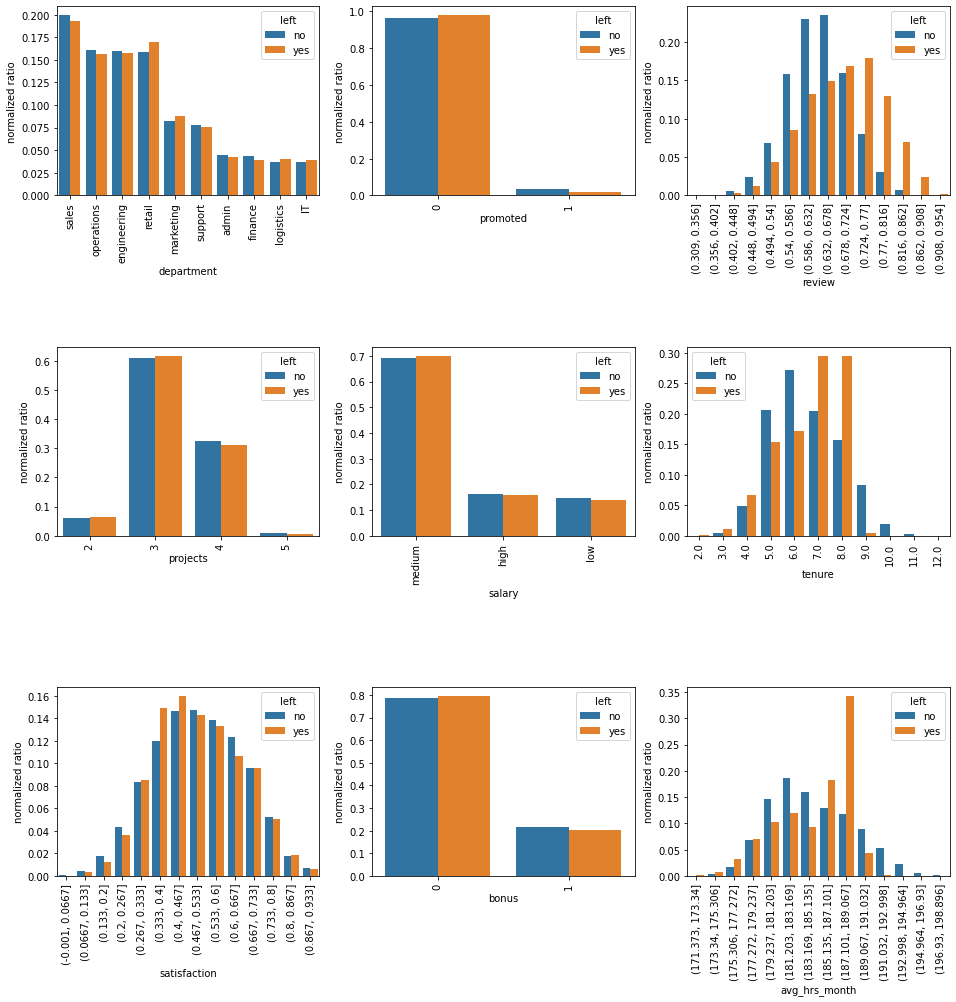

In [27]:
# figure formatting options
fig, ax = plt.subplots(3,3, sharex=False, figsize = [16,16] )
#fig.tight_layout(pad=8.0)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.8)


for n,i in enumerate(df.columns[0:-1]):
    #catches and handles categorical data:
    if df[i].nunique() < 20:
        #any variable with less than 20 unique variables is considered "categorical" 
        temp_df = (df.groupby(['left'])[i].value_counts(normalize = True).rename('normalized ratio').reset_index())
        plt.sca(ax[n//3][n%3])
        sns.barplot(x = i, y = 'normalized ratio', hue = 'left', data = temp_df)
        plt.xticks(rotation = 'vertical')
    else:
        bins = np.arange(start = df[i].min(), stop = df[i].max(), step = (df[i].max() - df[i].min()) / 15) 
        temp_df = (df.groupby(['left'])[i].value_counts(normalize = True, bins = bins, sort = False).rename('normalized ratio').reset_index())
        plt.sca(ax[n//3][n%3])
        sns.barplot(x = i , y = 'normalized ratio', hue = 'left', data = temp_df )
        plt.xlabel(str(i))
        plt.xticks(rotation = 'vertical')
    

In [22]:
df['promoted'].max()
temp_df = (df.groupby(['left'])[i].value_counts(normalize = True, bins = bins, sort = True).rename('normalized ratio').reset_index())
print(temp_df)        

   left          review  normalized ratio
0    no  (0.586, 0.655]          0.353316
1    no  (0.655, 0.724]          0.272202
2    no  (0.517, 0.586]          0.201451
3    no  (0.724, 0.793]          0.100207
4    no  (0.448, 0.517]          0.048993
5    no  (0.793, 0.862]          0.016578
6    no  (0.379, 0.448]          0.005921
7    no  (0.862, 0.931]          0.000888
8    no  (0.309, 0.379]          0.000296
9   yes  (0.724, 0.793]          0.251078
10  yes  (0.655, 0.724]          0.239583
11  yes  (0.586, 0.655]          0.211207
12  yes  (0.793, 0.862]          0.126796
13  yes  (0.517, 0.586]          0.109555
14  yes  (0.448, 0.517]          0.030891
15  yes  (0.862, 0.931]          0.025862
16  yes  (0.379, 0.448]          0.003951
17  yes  (0.309, 0.379]          0.000718
